Retrievs data from the web and saves it to local folder (./data/gis/)

In [1]:
import geopandas as gpd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp  
import requests
import json
from owslib.wfs import WebFeatureService

---

Public Water Systems

EPSG:4326


<Axes: >

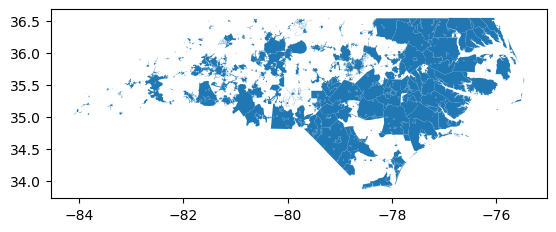

In [4]:
# obtain public water system data from NConeMap (crs 32119)

url = 'https://services.nconemap.gov/secure/rest/services/NC1Map_Water_Sewer_2004/MapServer/4/query?outFields=*&where=1%3D1&f=geojson'

pws = requests.get(url).json()


# convert to geodataframe

pws = gpd.GeoDataFrame.from_features(pws, crs=4326)

# check crs

print(pws.crs)

# save pws geojson to file

pws.to_file('../data/gis/polygon/pws.geojson', driver='GeoJSON')

pws.plot()

---
Geology

<Axes: >

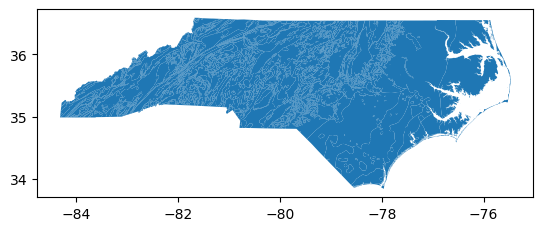

In [3]:
# import geology data from geojson on NC OneMap API
# check column names from geology important for modeling
# values assessible here https://www.nconemap.gov/datasets/nconemap::geology/about
# Put the url in a variable
url = "https://services.nconemap.gov/secure/rest/services/NC1Map_Geological/MapServer/2/query?outFields=*&where=1%3D1&f=geojson"

# Get the data

geol = requests.get(url).json()

# convert to geodataframe

gdf_geol = gpd.GeoDataFrame.from_features(geol)

# set crs

gdf_geol.crs = 4269

gdf_geol.to_file(filename='../data/gis/polygon/geology.geojson', driver='GeoJSON')

gdf_geol.plot()

---
County Border


<Axes: >

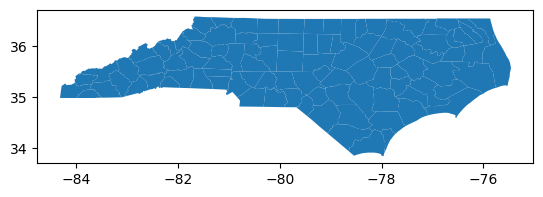

In [126]:
# Read in the county border from NC OneMap API (esri rest service)

url = "https://services1.arcgis.com/YBWrN5qiESVpqi92/arcgis/rest/services/ncgs_state_county_boundary/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=geojson"

res = requests.get(url).json()


gdf_cnty = gpd.GeoDataFrame.from_features(res)

# save county geojson to file

gdf_cnty.to_file('../data/gis/polygon/county.geojson', driver='GeoJSON')

gdf_cnty.plot()

---

Mineral Resource Data System

In [6]:
# dowload zip from web

url = "https://mrdata.usgs.gov/mrds/mrds-csv.zip"

r = requests.get(url)

with open("../data/csv/mrds-csv.zip", "wb") as code:
    code.write(r.content)

# unzip file

import zipfile

with zipfile.ZipFile("../data/csv/mrds-csv.zip","r") as zip_ref:
    zip_ref.extractall("../data/csv/")


C:\Users\kendall\AppData\Local\Temp\ipykernel_9896\3293972406.py:19: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/csv/mrds.csv')


Index(['dep_id', 'url', 'mrds_id', 'mas_id', 'site_name', 'latitude',
       'longitude', 'region', 'country', 'state', 'county', 'com_type',
       'commod1', 'commod2', 'commod3', 'oper_type', 'dep_type', 'prod_size',
       'dev_stat', 'ore', 'gangue', 'other_matl', 'orebody_fm', 'work_type',
       'model', 'alteration', 'conc_proc', 'names', 'ore_ctrl', 'reporter',
       'hrock_unit', 'hrock_type', 'arock_unit', 'arock_type', 'structure',
       'tectonic', 'ref', 'yfp_ba', 'yr_fst_prd', 'ylp_ba', 'yr_lst_prd',
       'dy_ba', 'disc_yr', 'prod_yrs', 'discr', 'score'],
      dtype='object')

C:\Users\kendall\AppData\Local\Temp\ipykernel_9896\1709509389.py:3: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/csv/mrds.csv')


<Axes: >

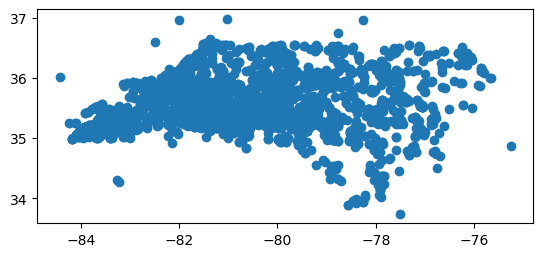

In [12]:

# read in csv

df = pd.read_csv('../data/csv/mrds.csv')

df = df[df['state'] == "North Carolina"]

#convert to geodataframe

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=4326)

# save to file

gdf.to_file('../data/gis/point/mines.geojson', driver='GeoJSON')

gdf.plot()


---
Mineral Resource Data System - Supplemental Data (big download)

if more information about mines is required, this is the place to go



In [ ]:
'''
url = "https://mrdata.usgs.gov/mrds/rdbms-tab-all.zip"
r = requests.get(url)
with open("../data/csv/mrds-rdbms-tab-all.zip", "wb") as code:
    code.write(r.content)
# unzip file
with zipfile.ZipFile("../data/csv/mrds-rdbms-tab-all.zip","r") as zip_ref:
    zip_ref.extractall("../data/csv/")
# read in csv
df = pd.read_csv('../data/csv/mrds-rdbms-tab-all.csv')
# check column names
'''

---

In [ ]:
#Couldnt get this to work - imports land use data

# available fields 'OBJECTID,Shape,Name,MinPS,MaxPS,LowPS,HighPS,Category,Tag,GroupName,ProductName,CenterX,CenterY,ZOrder,Year,# StartDate,EndDate,Shape_Length,Shape_Area',

'''
url = "https://ic.imagery1.arcgis.com/arcgis/rest/services/Sentinel2_10m_LandCover/ImageServer/query"

params = {
    'geometry': gdf_cnty.geometry[0],
    'geometryType': 'esriGeometryPolygon',
    'inSR': gdf_cnty.crs,
    'distance': '10000', 
    'units': 'esriSRUnit_Meter', 
    'returnGeometry': 'true', 
    'outFields': 'OBJECTID, Shape, Name, Category',
    'f': 'json',
    'outSR': '4269',
    'spatialRel': 'esriSpatialRelContains'
}




response = requests.get(url=url, params=params)


if response.status_code == 200:
    out = response.json()['features']


# write to file
with open('../data/gis/polygon/landuse.geojson', 'w') as f:
    json.dump(out, f)


# read in the json file
with open('../data/gis/polygon/landuse.geojson') as f:
    data = json.load(f)


# function to convert json to geodataframe by extracting the geometry and attributes
# and creating a dictionary for each feature with the following keys: 
#'id' : i
#'type' :  "Feature"
# 'properties' : {data[i]['attributes']}
# 'geometry' : {"type": "Polygon", "coordinates" : (data[i]['geometry'])}

def json_to_gdf(data):
    gdf = []
    for i in range(len(data)):
        gdf.append({'id' : i,
                    'type' :  "Feature",
                    'properties' : data[i]['attributes'],
                    'geometry' : {"type": "Polygon", "coordinates" : data[i]['geometry']['rings']}
                   })
    return gdf

# convert to geodataframe

gdf_landuse = gpd.GeoDataFrame.from_features(json_to_gdf(data))

'''